In [1]:
from scipy import stats

C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
import pandas as pd
import pandas_datareader.data as web
import datetime

In [5]:
start = datetime.datetime(2020,5,1)
end = datetime.datetime(2021,5,1)

In [6]:
spy = web.DataReader('SPY', 'yahoo', start, end)

In [7]:
spy

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-01,290.660004,281.519989,285.309998,282.790009,125180000.0,278.326569
2020-05-04,283.899994,279.130005,280.739990,283.570007,80873200.0,279.094299
2020-05-05,289.250000,283.709991,286.640015,286.190002,79569900.0,281.672913
2020-05-06,288.459991,283.779999,288.040009,284.250000,73632600.0,279.763550
2020-05-07,289.779999,287.130005,287.750000,287.679993,75250400.0,283.139404
...,...,...,...,...,...,...
2021-04-26,418.220001,416.809998,417.440002,417.609985,52182400.0,417.609985
2021-04-27,418.140015,416.299988,417.929993,417.519989,51303100.0,417.519989
2021-04-28,419.010010,416.899994,417.809998,417.399994,51238900.0,417.399994


In [8]:
apple = web.DataReader('AAPL', 'yahoo', start, end)

In [9]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Date'>

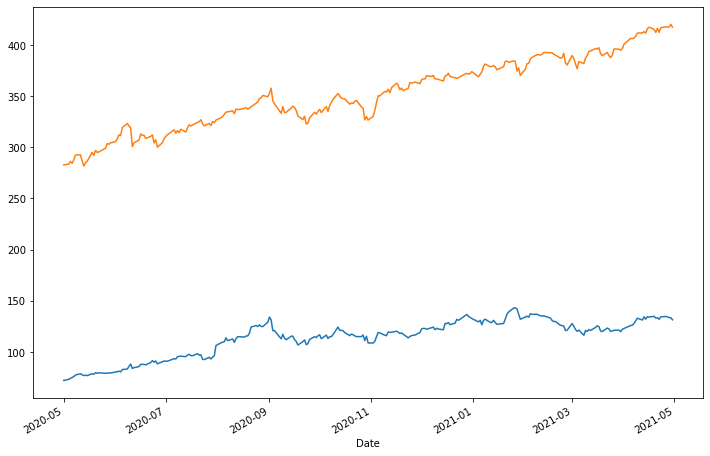

In [10]:
apple['Close'].plot(figsize = (12,8))
spy['Close'].plot(figsize = (12,8))

In [11]:
apple['Cumulative'] = apple['Close'] / apple['Close'].iloc[0]
spy['Cumulative'] = spy['Close'] / spy['Close'].iloc[0]

<AxesSubplot:xlabel='Date'>

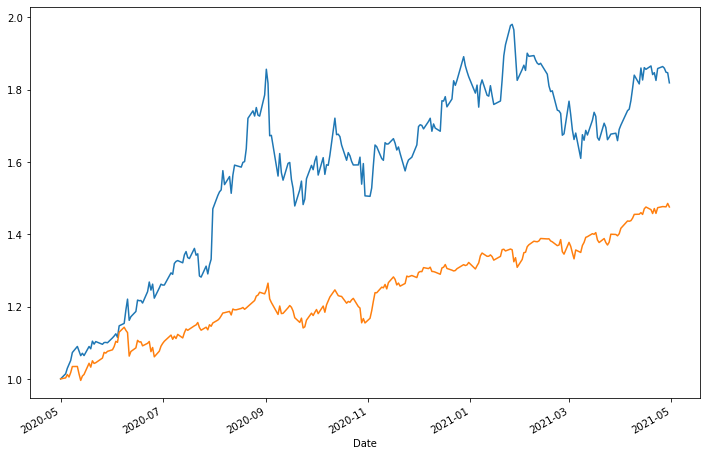

In [12]:
apple['Cumulative'].plot(figsize = (12,8))
spy['Cumulative'].plot(figsize = (12,8))

In [13]:
apple['Daily'] = apple['Close'].pct_change(1)
spy['Daily'] = spy['Close'].pct_change(1)

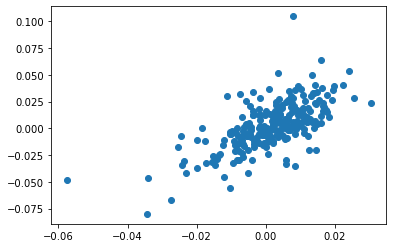

In [14]:
plt.scatter(spy['Daily'], apple['Daily'])

In [15]:
beta, alpha, r_value, p_value, std_error = stats.linregress(apple['Daily'].iloc[1:] , spy['Daily'].iloc[1:])

In [42]:
beta, alpha, r_value, p_value, std_error

(0.33239061402937387,
 0.0007389532233022172,
 0.6635553934615943,
 3.1567044744486586e-33,
 0.02374910859563662)

In [43]:
spy['Daily'].head()

Date
2020-05-01         NaN
2020-05-04    0.002758
2020-05-05    0.009239
2020-05-06   -0.006779
2020-05-07    0.012067
Name: Daily, dtype: float64

In [44]:
import numpy as np

In [45]:
noise = np.random.normal(0,0.001, len(spy['Daily'].iloc[1:]))

In [47]:
fake_stock = spy['Daily'].iloc[1:] + noise

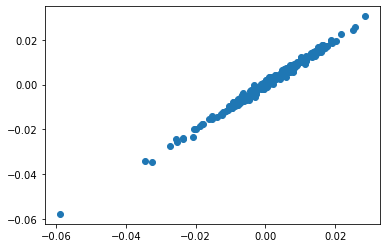

In [48]:
plt.scatter(fake_stock, spy['Daily'].iloc[1:])